# Use CDF to Calculate Probabilities (Practice)

We will use the human height data set:

Use the normal cumulative distribution function with the mean and standard deviation of female height to calculate the probability that a female's height is:

1. between 55.0 and 56.0 inches

2. is less than 5 feet (60 in)

3. is greater than the mean (hint: do you know this answer intuitively?)

# Import

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Load data

In [4]:
df= pd.read_csv("K:\coding_DOJO\weight-height - weight-height.csv")
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [5]:
# I will use only height of female 
data = df['Height'].loc[df['Gender'] == 'Female'].copy()
data

5000    58.910732
5001    65.230013
5002    63.369004
5003    64.479997
5004    61.793096
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 5000, dtype: float64

In [25]:
# calculate mean, std, min and max
min = np.min(data)
max = np.max(data)
mean = np.mean(data)
std = np.std(data)

# 1 - between 55.0 and 56.0 inches

In [19]:
low_end = 55.0
high_end = 56.0

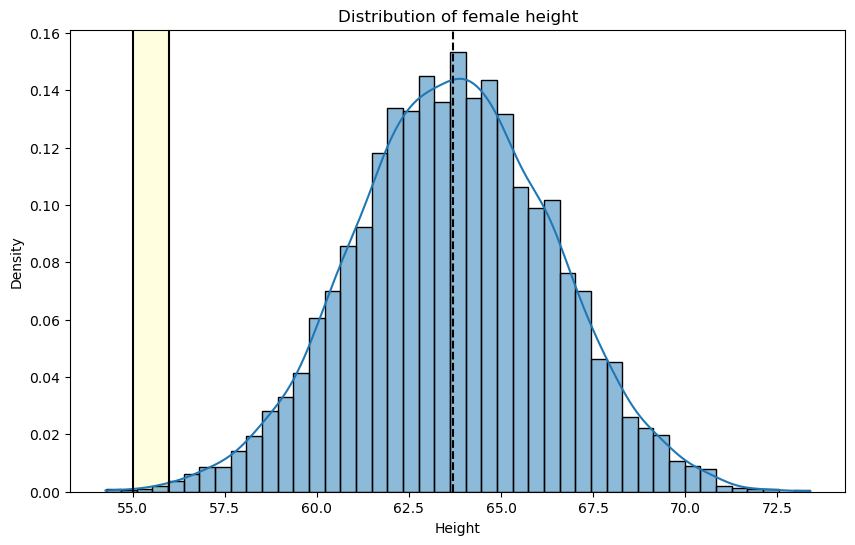

In [23]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data, stat= 'density', kde=True )
ax.set_title('Distribution of female height')
ax.axvline(low_end, color='black')
ax.axvline(high_end, color = 'black')
ax.axvline(mean, color ='k', ls='--')
ax.axvspan(low_end, high_end, color = 'lightyellow', zorder = 0)

In [26]:
# Set the range and spacing for our normal curve
x_range = np.linspace(min, max,1000)

In [33]:
# set cumulative distribution function 
cdf = stats.norm.cdf(x_range, loc=mean, scale=std)

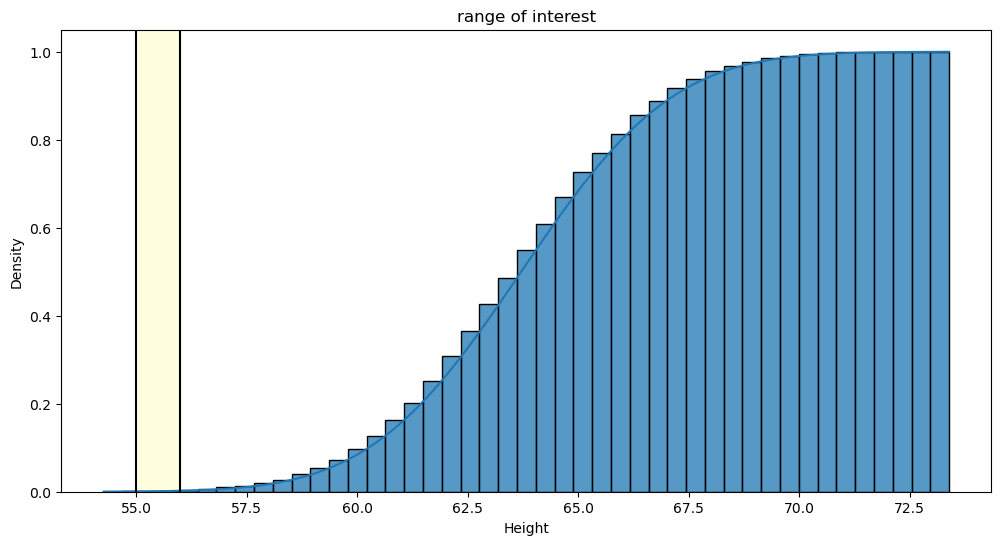

In [37]:
# plot Cumulative Distribution

fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density', cumulative = True)
ax.plot(x_range,cdf)
ax.axvline(high_end, color = 'black')
ax.axvline(low_end, color = 'black')
ax.axvspan(low_end, high_end, color = 'lightyellow', zorder=0)
ax.set_title('range of interest');

In [38]:
# subtract to find the probability of a value occurring in the range 
answer_1 = stats.norm.cdf(high_end, loc=mean, scale=std) - stats.norm.cdf(low_end, loc=mean, scale=std)
answer_1

0.0015043054289559897

The probability that a female's height is between 55.0 and 56.0 inches is 1,15%

# 2. is less than 5 feet (60 in)

In [39]:
answer_2 = stats.norm.cdf(60, loc=mean, scale=std)
answer_2

0.08446492725207488

The probability that a female's height is less than 60 in is 8.4%

# 3. is greater than the mean (hint: do you know this answer intuitively?)

In [41]:
mean

63.708773603458006

In [42]:
answer_3 = 1 - stats.norm.cdf(mean, loc=mean, scale=std)
answer_3 

0.5

The probability that a female's height is greater than the mean is 50%